In [ ]:
!unzip urdf.zip -d urdf

Archive:  urdf.zip
   creating: urdf/urdf/gripper/
   creating: urdf/urdf/gripper/mesh/
   creating: urdf/urdf/gripper/mesh/robotiq_140/
   creating: urdf/urdf/gripper/mesh/robotiq_140/collision/
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_inner_finger.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_inner_knuckle.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_outer_finger.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_140_outer_knuckle.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_base_link.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/collision/robotiq_arg2f_coupling.stl  
   creating: urdf/urdf/gripper/mesh/robotiq_140/visual/
  inflating: urdf/urdf/gripper/mesh/robotiq_140/visual/robotiq_arg2f_140_inner_finger.stl  
  inflating: urdf/urdf/gripper/mesh/robotiq_140/visual/robotiq_arg2f_140_inner_knuckle.stl  
  infl

# 1. Unified Robotics Description Format (URDF)
- Reference: [URDF Tutorial in ROS Notes](https://abedgnu.github.io/Notes-ROS/chapters/ROS/10_robot_modeling/urdf.html)

URDF is an xml file that describe the geometry of a robot. URDF is a tree structure with one root link. The measuring units are meters and radians.

# Why URDF?
1. Standardization: URDF provides a standardized format for describing robotic systems, ensuring interoperability between different software tools and frameworks.
2. Comprehensive Representation: URDF describes robot kinematics, appearance, collision geometry, joint properties, and sensors, enabling accurate modeling and simulation of complex robots.
3. Compatibility: URDF is supported by various robotics software frameworks like ROS, Gazebo, and MoveIt, allowing seamless integration and leveraging existing tools and ecosystems.
4. Simulation and Visualization: URDF facilitates robot simulation and visualization in tools like Gazebo, enabling testing of control algorithms and evaluation of robot performance in different environments.
5. Collaboration and Sharing: URDF files can be easily shared among researchers and developers, promoting collaboration, knowledge exchange, and reuse of robot models, components, and designs.

## 1.1 Robot
A robot is composed mainly from links, and joints.


```
<robot name="robot_name">
  <link>  </link>
  <link>  </link>

  <joint>  </joint>
  <joint>  </joint>
</robot>
```
## 1.2 Link
The link element describes a rigid body with an inertia, visual features, and collision properties.

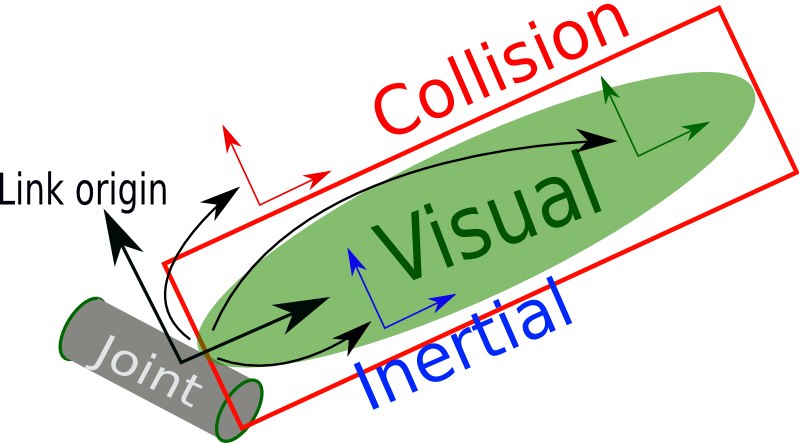

The main components of link tag are as follow:

```
<link name="link_name">

  <visual>
      <origin xyz="0 0 0" rpy="0 0 0" />
      <geometry>
        <cylinder length="0.6" radius="0.2"/>
      </geometry>
  </visual>

  <collision>
      <origin xyz="0 0 0" rpy="0 0 0" />
      <geometry>
          <cylinder length="0.6" radius="0.2"/>
      </geometry>
  </collision>

  <inertial>
      <origin xyz="0 0 0" rpy="0 0 0"/>
      <mass value="1"/>
      <inertia
          ixx="1.0" ixy="0.0" ixz="0.0"
          iyy="1.0" iyz="0.0"
          izz="1.0"/>
  </inertial>
</link>
```

The visual tag specifies the shape of the object (box, cylinder, sphere, mesh, etc.) for visualization purposes. Its origin is the reference frame of the visual element with respect to the reference frame of the link (The reference frame of the link is its joint).

The collision can be the same as visual, or its geometry a little bit bigger. Its origin is the reference frame of the collision element, relative to the reference frame of the link.

The inertial tag is need if the model is loaded in a simulator with physics engine. Its origin is the pose of the inertial reference frame, relative to the link reference frame. The origin of the inertial reference frame needs to be at the center of gravity. The axes of the inertial reference frame do not need to be aligned with the principal axes of the inertia.

## 1.3. Joint
The joint describe the relative motion between two links. It can be revolute, continuous, prismatic, fixed, floating, planar.

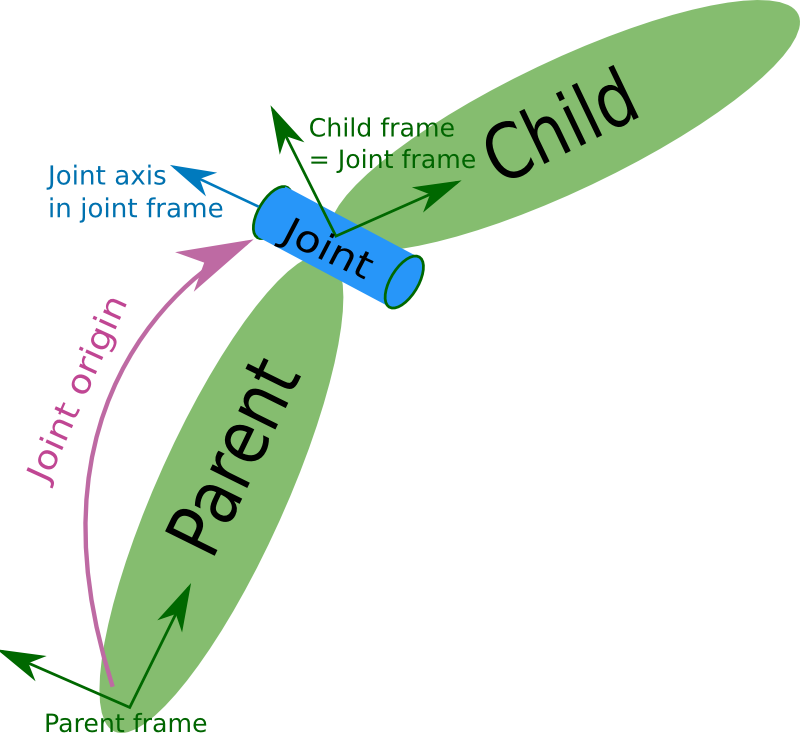

Basic properties of a joint tag:

```
<joint name="joint_name" type="continuous">
  <parent link="link1"/>
  <child link="link2"/>

  <origin xyz="0 0 0" rpy="0 0 0"/>
  <axis xyz="1 0 0"/>

</joint>
```

The origin is the transform from the parent link to the child link. The joint is located at the origin of the child link. So the origin is the relative position of the child frame respect to the parent frame.

The joint axis specified in the joint frame. This is the axis of rotation for revolute joints, the axis of translation for prismatic joints, and the surface normal for planar joints. The axis is specified in the joint frame of reference. Fixed and floating joints do not use the axis field.

The joint have other properties as dynamics, limit, etc. Limits are in radians for revolute joints and meters for prismatic joints and are omitted if the joint is continuous or fixed.

```
<?xml version="1.0"?>
<robot name="origins">

  <link name="base_link">
  </link>

  <link name="right_leg">
  </link>

  <joint name="base_to_right_leg" type="fixed">
    <parent link="base_link"/>
    <child link="right_leg"/>
    <origin xyz="0 -0.22 0.25"/>
  </joint>

</robot>
```


1. Import the necessary module from the ElementTree library.
2. Define the file path of the URDF file as 'file_path'. Load 'panda.urdf' first.
3. Parse the URDF file using the parse method of ElementTree and store the resulting tree in a variable named 'tree_xml'.
4. Obtain the root element of the parsed XML tree using the getroot() method and store it in a variable named root.
5. Print the XML content of the root element using the tostring() method with the encoding specified as "unicode".

In [ ]:
from xml.etree import ElementTree as ET

file_path = "/content/urdf/urdf/panda/panda.urdf"
tree_xml = ET.parse(file_path)
root = tree_xml.getroot()
print(ET.tostring(root, encoding='unicode'))

<robot name="panda">
  <link name="panda_link_0">
    <visual>
      <geometry>
        <mesh filename="meshes/visual/link0.stl" />
      </geometry>
      <material name="panda_white">
        <color rgba="1. 1. 1. 1." />
      </material>
    </visual>
    <collision>
      <geometry>
        <mesh filename="meshes/collision/link0.stl" />
      </geometry>
      <material name="panda_white">
        <color rgba="1. 1. 1. 1." />
      </material>
    </collision>
  </link>

  <link name="panda_pedestal">
    <visual>
      <origin rpy="1.57079632679 0 -1.57079632679" xyz="0.26 0.345 -0.91488" />
      <geometry>
        <mesh filename="meshes/panda_pedestal/pedestal.STL" />
      </geometry>
      <material name="darkgray">
        <color rgba=".2 .2 .2 1" />
      </material>
    </visual>
    <collision>
      <origin rpy="0 0 0" xyz="-0.02 0 -0.29" />
      <geometry>
        <cylinder length="0.62" radius="0.18" />
      </geometry>
    </collision>
    <inertial>
      <origin rp

1. Count the number of <link> elements in the URDF file using the XPath expression .//link.
2. Count the number of <joint> elements in the URDF file using the XPath expression .//joint.
3. Print the total number of links.
4. Print the total number of joints.

In [ ]:
num_links = len(root.findall(".//link"))
num_joints = len(root.findall(".//joint"))

print("Number of Links:", num_links)
print("Number of Joints:", num_joints)

Number of Links: 16
Number of Joints: 15


1. Initialization of Joint Type Counter: It initializes an empty dictionary joint_types_count to store the counts of different joint types encountered during the parsing of a URDF file.

2. Counting Joint Types: It iterates through each <joint> element in the XML tree parsed from the URDF file. For each joint, it retrieves the type of the joint using the get() method and updates the corresponding count in the joint_types_count dictionary. This step counts the occurrences of each joint type encountered in the URDF file.

In [ ]:
joint_types_count = {}

for joint in root.findall(".//joint"):
  joint_type = joint.get('type')
  joint_types_count[joint_type] = joint_types_count.get(joint_type, 0) + 1

print(joint_types_count)

{'fixed': 6, 'revolute': 7, 'prismatic': 2}


1. Initialize empty lists gripper_links and finger_links to store the names of gripper and finger links, respectively.
2. Initialize dictionaries gripper_joint_types_count and finger_joint_types_count to count the occurrences of different joint types for gripper and finger.
3. Loop through all links in the URDF file.
4. Check if the link name contains "gripper" or "finger" and append it to the corresponding list.
5. Loop through all joints in the URDF file.
6. Check if the joint name contains any gripper link name.
7. If so, increment the count of the corresponding joint type in gripper_joint_types_count.
8. If not, check if the joint name contains any finger link name.
9. If found, increment the count of the corresponding joint type in finger_joint_types_count.
10. Print the gripper and finger links along with the counts of joint types for each.

In [ ]:
gripper_links = []
finger_links = []
gripper_joint_types_count = {'fixed': 0, 'revolute': 0, 'prismatic': 0}
finger_joint_types_count = {'fixed': 0, 'revolute': 0, 'prismatic': 0}

for link in root.findall(".//link"):
  link_name = link.get('name')
  if ("gripper" in link_name.lower()):
    gripper_links.append(link_name)
  elif ("finger" in link_name.lower()):
    finger_links.append(link_name)

for joint in root.findall(".//joint"):
  joint_name = joint.get('name')
  joint_type = joint.get('type')
  if ("gripper" in joint_name.lower()):
    gripper_joint_types_count[joint_type] = gripper_joint_types_count.get(joint_type, 0) + 1
  elif ("finger" in joint_name.lower()):
    finger_joint_types_count[joint_type] = finger_joint_types_count.get(joint_type, 0) + 1

print("Gripper Links:", gripper_links)
print("Finger Links:", finger_links)
print("Gripper Joint Types Count:", gripper_joint_types_count)
print("Finger Joint Types Count:", finger_joint_types_count)

Gripper Links: ['right_gripper']
Finger Links: ['leftfinger', 'rightfinger']
Gripper Joint Types Count: {'fixed': 1, 'revolute': 0, 'prismatic': 0}
Finger Joint Types Count: {'fixed': 0, 'revolute': 0, 'prismatic': 2}


1. Find Links with "link" in Name: The code first parses through the URDF file to find all links whose names contain the substring "link". This is done using an XML parser to traverse the document tree and identify the relevant elements.

2. Count Joints Connecting "link" Links: Next, the code identifies all joints that connect the links found in the previous step. It ensures that it only considers joints whose parent and child links are both among the links with names containing "link". This prevents double counting of joints that connect other links.

3. Count Joint Types: For each joint connecting "link" links, the code counts the occurrences of different joint types: fixed, revolute, and prismatic. It accurately tallies these counts to provide insights into the types of joints present in the robot model.

4. Calculate Degree of Freedom (DOF): Using the Grubler formula, the code calculates the degree of freedom of the robot model. The formula considers the number of links, total joints, and the types of joints present in the model.

5. Print Results: Finally, the code prints out the following information:
  - Degree of Freedom (DOF) of the robot model.
  - The number of links whose names contain "link".
  - The total number of joints connecting these links.
  - The counts of fixed, revolute, and prismatic joints.

  By addressing these tasks, the code effectively analyzes the URDF file to provide insights into the structure and types of joints in the robot model, specifically focusing on links with names containing "link".

In [ ]:
# Initialize variables for counting links and joint types
num_links = 0
num_total_joints = 0
num_fixed_joints = 0
num_revolute_joints = 0
num_prismatic_joints = 0
processed_links = set()
processed_joints = set()
dof = 0
for link in root.findall(".//link"):
  link_name = link.get('name')
  if ("link" in link_name.lower()):
    num_links+=1
    processed_links.add(link_name)

for joint in root.findall(".//joint"):
  parent_link = joint.find('parent').get('link')
  child_link = joint.find('child').get('link')
  joint_type = joint.get('type')
  if parent_link in processed_links and child_link in processed_links:
    joint_name = joint.get('name')
    if joint_name  not in processed_joints:
      processed_joints.add(joint_name)
      num_total_joints += 1

      if joint_type == "fixed":
        num_fixed_joints +=1
      elif joint_type == "revolute":
        num_revolute_joints +=1
      elif joint_type == "prismatic":
        num_prismatic_joints +=1

dof = 6*(num_links -1 - num_total_joints) + 1*num_revolute_joints+1*num_prismatic_joints
# Print the results
print("DOF:", dof)
print("Number of links with names containing 'link':", num_links)
print("Total number of joints connecting these links:", num_total_joints)
print("Number of fixed joints:", num_fixed_joints)
print("Number of revolute joints:", num_revolute_joints)
print("Number of prismatic joints:", num_prismatic_joints)

DOF: 7
Number of links with names containing 'link': 8
Total number of joints connecting these links: 7
Number of fixed joints: 0
Number of revolute joints: 7
Number of prismatic joints: 0


1. Compute other robots' DoF such as sawyer and ur5e using the above procedures

In [ ]:
file_path = "/content/urdf/urdf/sawyer/sawyer.urdf"
tree_xml = ET.parse(file_path)
root = tree_xml.getroot()
print(ET.tostring(root, encoding='unicode'))

<robot xmlns:ns0="http://www.ros.org/wiki/xacro" name="sawyer">
  <ns0:arg name="gazebo" default="false" />
  <ns0:arg name="pedestal" default="true" />
  <material name="black">
    <color rgba="0 0 0 1" />
  </material>
  <material name="darkgray">
    <color rgba=".2 .2 .2 1" />
  </material>
  <material name="darkred">
    <color rgba=".5 .1 .1 1" />
  </material>
  <material name="red">
    <color rgba=".5 .1 .1 1" />
  </material>
  <material name="sawyer_gray">
    <color rgba="0.75294 0.75294 0.75294 1" />
  </material>
  <link name="sawyer_base" />
  <link name="sawyer_torso">
    <visual>
      <origin rpy="0 0 0" xyz="0 0 0" />
      <geometry>
        <box size="0.001 0.001 0.001" />
      </geometry>
      <material name="darkgray">
        <color rgba=".2 .2 .2 1" />
      </material>
    </visual>
<ns0:unless value="$(arg gazebo)">
    <inertial>
      <origin rpy="0 0 0" xyz="0.000000 0.000000 0.000000" />
      <mass value="0.0001" />
      <inertia ixx="1e-08" ixy="0"

In [ ]:
num_links = len(root.findall(".//link"))
num_joints = len(root.findall(".//joint"))

print("Number of Links:", num_links)
print("Number of Joints:", num_joints)

Number of Links: 27
Number of Joints: 26


In [ ]:
joint_types_count = {}

for joint in root.findall(".//joint"):
  joint_type = joint.get('type')
  joint_types_count[joint_type] = joint_types_count.get(joint_type, 0) + 1

print(joint_types_count)

{'fixed': 18, 'revolute': 8}


In [ ]:
gripper_links = []
finger_links = []
gripper_joint_types_count = {'fixed': 0, 'revolute': 0, 'prismatic': 0}
finger_joint_types_count = {'fixed': 0, 'revolute': 0, 'prismatic': 0}

for link in root.findall(".//link"):
  link_name = link.get('name')
  if ("gripper" in link_name.lower()):
    gripper_links.append(link_name)
  elif ("finger" in link_name.lower()):
    finger_links.append(link_name)

for joint in root.findall(".//joint"):
  joint_name = joint.get('name')
  joint_type = joint.get('type')
  if ("gripper" in joint_name.lower()):
    gripper_joint_types_count[joint_type] = gripper_joint_types_count.get(joint_type, 0) + 1
  elif ("finger" in joint_name.lower()):
    finger_joint_types_count[joint_type] = finger_joint_types_count.get(joint_type, 0) + 1

print("Gripper Links:", gripper_links)
print("Finger Links:", finger_links)
print("Gripper Joint Types Count:", gripper_joint_types_count)
print("Finger Joint Types Count:", finger_joint_types_count)

Gripper Links: []
Finger Links: []
Gripper Joint Types Count: {'fixed': 0, 'revolute': 0, 'prismatic': 0}
Finger Joint Types Count: {'fixed': 0, 'revolute': 0, 'prismatic': 0}


In [ ]:
num_links = 0
num_total_joints = 0
num_fixed_joints = 0
num_revolute_joints = 0
num_prismatic_joints = 0
processed_links = set()
processed_joints = set()
dof = 0
for link in root.findall(".//link"):
  link_name = link.get('name')
  if ("link" in link_name.lower()):
    num_links+=1
    processed_links.add(link_name)

for joint in root.findall(".//joint"):
  parent_link = joint.find('parent').get('link')
  child_link = joint.find('child').get('link')
  joint_type = joint.get('type')
  if parent_link in processed_links and child_link in processed_links:
    joint_name = joint.get('name')
    if joint_name  not in processed_joints:
      processed_joints.add(joint_name)
      num_total_joints += 1

      if joint_type == "fixed":
        num_fixed_joints +=1
      elif joint_type == "revolute":
        num_revolute_joints +=1
      elif joint_type == "prismatic":
        num_prismatic_joints +=1

dof = 6*(num_links -1 - num_total_joints) + 1*num_revolute_joints+1*num_prismatic_joints
# Print the results
print("DOF:", dof)
print("Number of links with names containing 'link':", num_links)
print("Total number of joints connecting these links:", num_total_joints)
print("Number of fixed joints:", num_fixed_joints)
print("Number of revolute joints:", num_revolute_joints)
print("Number of prismatic joints:", num_prismatic_joints)

DOF: 7
Number of links with names containing 'link': 11
Total number of joints connecting these links: 10
Number of fixed joints: 3
Number of revolute joints: 7
Number of prismatic joints: 0
